# Keras binary and multiclass classification examples

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Binary classification: Heart Disease

In [232]:
df = pd.read_csv('E:\\Datasets\\heart.csv')

In [233]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### EDA & Data wrangling

In [58]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [234]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


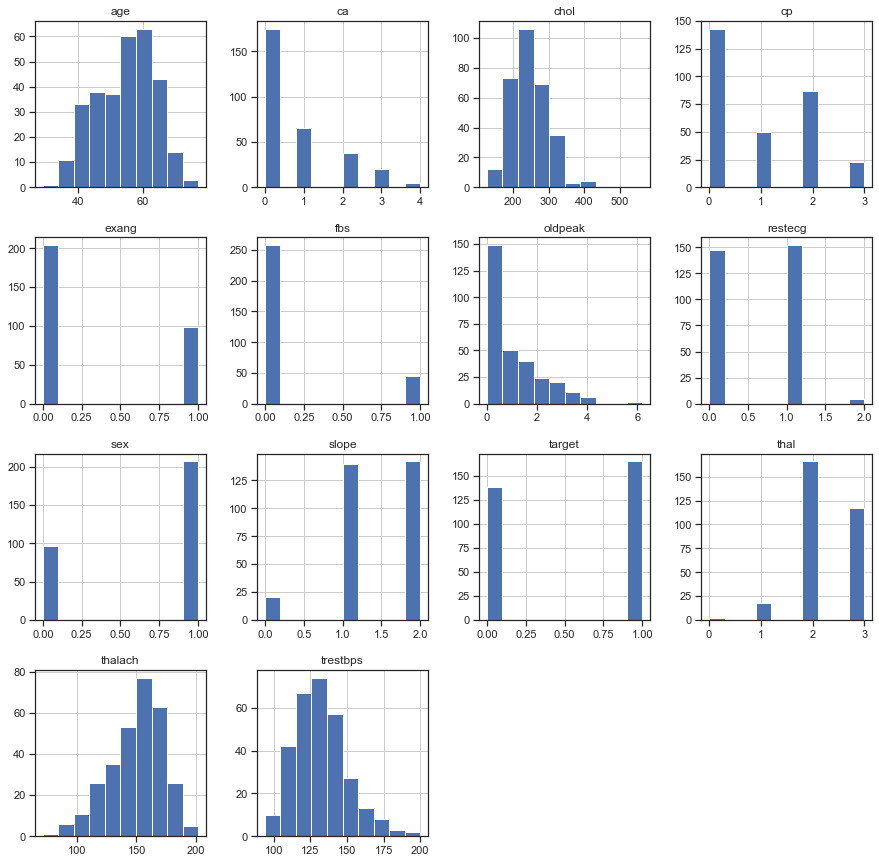

In [221]:
_ = df.hist(figsize=(15,15))

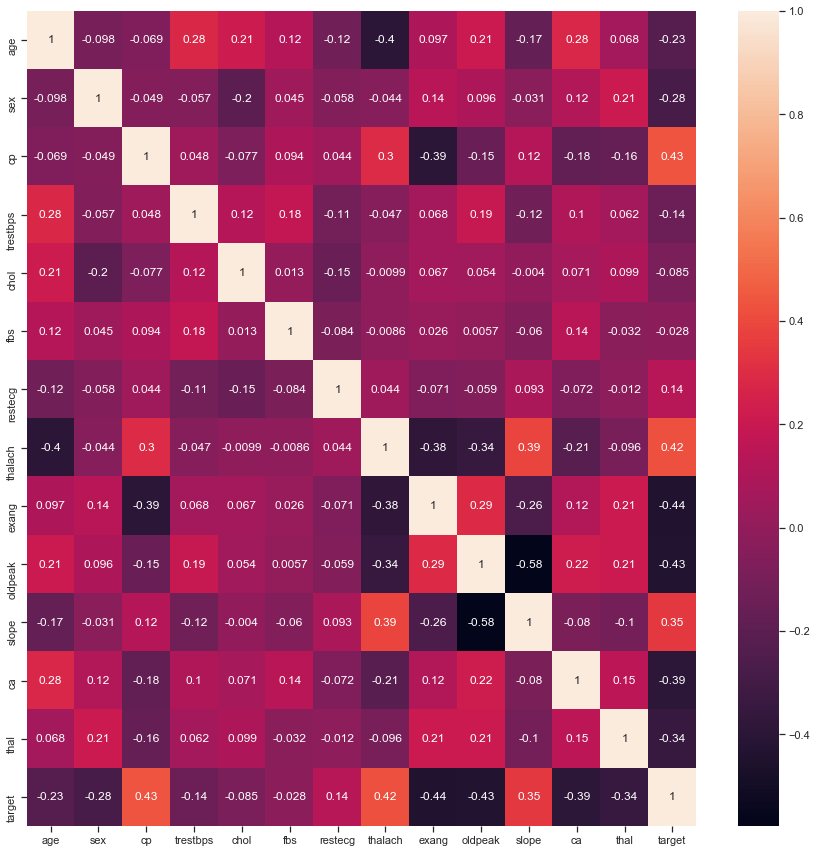

In [224]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df.corr(), annot = True, ax=ax)

Text(0.5, 0, 'target')

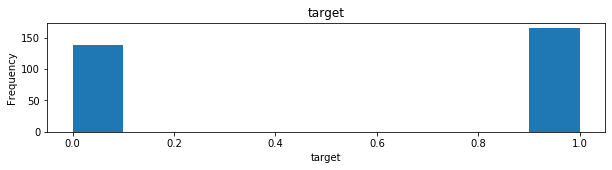

In [61]:
feature = 'target'
plt.figure(figsize=(10,2))
df[feature].plot(kind='hist', title=feature)
plt.xlabel(feature)

In [62]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Missings

In [63]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### Classification

#### Normalize data

In [64]:
from sklearn import preprocessing
X = preprocessing.normalize(df.drop(['target'], axis=1))
y = df['target'].values

In [65]:
X

array([[0.19745405, 0.00313419, 0.00940257, ..., 0.        , 0.        ,
        0.00313419],
       [0.10874818, 0.00293914, 0.00587828, ..., 0.        , 0.        ,
        0.00587828],
       [0.1368249 , 0.        , 0.00333719, ..., 0.00667439, 0.        ,
        0.00667439],
       ...,
       [0.23671899, 0.00348116, 0.        , ..., 0.00348116, 0.00696232,
        0.01044348],
       [0.25352009, 0.00444772, 0.        , ..., 0.00444772, 0.00444772,
        0.01334316],
       [0.1749685 , 0.        , 0.00306962, ..., 0.00306962, 0.00306962,
        0.00613925]])

In [66]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
y.shape

(303,)

#### Preparing target labels for keras model

In [68]:
from keras.utils import to_categorical
y_cat = to_categorical(y)

In [69]:
print(y_cat.shape)

(303, 2)


In [70]:
y_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

#### Model

In [170]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

n_features = len(df.columns)-1
model = Sequential()
#Dense: number of labels/classes, activation funct: softmax for multi-classf, sigmoid for binary classf.
#input_shape(n_features,) or input_dim=n_features)
model.add(Dense(2, input_shape=(n_features,), activation = 'sigmoid'))  
#Loss optimizer: Adam, SGD, loss funct= categorical_crossentropy for multi-class, binary_crossentropy for binary class.
model.compile(Adam(lr=1), loss='binary_crossentropy', metrics = ['accuracy'])

In [171]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 2)                 28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


#### Train and Test split

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_cat,test_size = 0.2)

In [173]:
len(X_train)

242

In [174]:
y_train.shape

(242, 2)

#### Train model

In [175]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

Train on 242 samples, validate on 61 samples
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8568 - accuracy: 0.4607 - val_loss: 0.7504 - val_accuracy: 0.4098
Epoch 2/100
242/242 [==============================] - 0s 45us/step - loss: 0.6682 - accuracy: 0.5826 - val_loss: 0.6291 - val_accuracy: 0.7213
Epoch 3/100
242/242 [==============================] - 0s 50us/step - loss: 0.6372 - accuracy: 0.6488 - val_loss: 0.6050 - val_accuracy: 0.7377
Epoch 4/100
242/242 [==============================] - 0s 50us/step - loss: 0.6391 - accuracy: 0.6219 - val_loss: 0.6799 - val_accuracy: 0.5328
Epoch 5/100
242/242 [==============================] - 0s 54us/step - loss: 0.6436 - accuracy: 0.6302 - val_loss: 0.7413 - val_accuracy: 0.4672
Epoch 6/100
242/242 [==============================] - 0s 45us/step - loss: 0.6151 - accuracy: 0.6198 - val_loss: 0.5738 - val_accuracy: 0.6639
Epoch 7/100
242/242 [==============================] - 0s 41us/step - loss: 0.5616 - accurac

In [176]:
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

from sklearn.metrics import classification_report
y_test_pred= (y_test_pred> 0.5) 
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76        25
           1       0.80      0.97      0.88        36

   micro avg       0.84      0.84      0.84        61
   macro avg       0.87      0.81      0.82        61
weighted avg       0.86      0.84      0.83        61
 samples avg       0.84      0.84      0.84        61



## Multi-class classification: wines

In [236]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [237]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


### EDA & Data wrangling

In [227]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [228]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


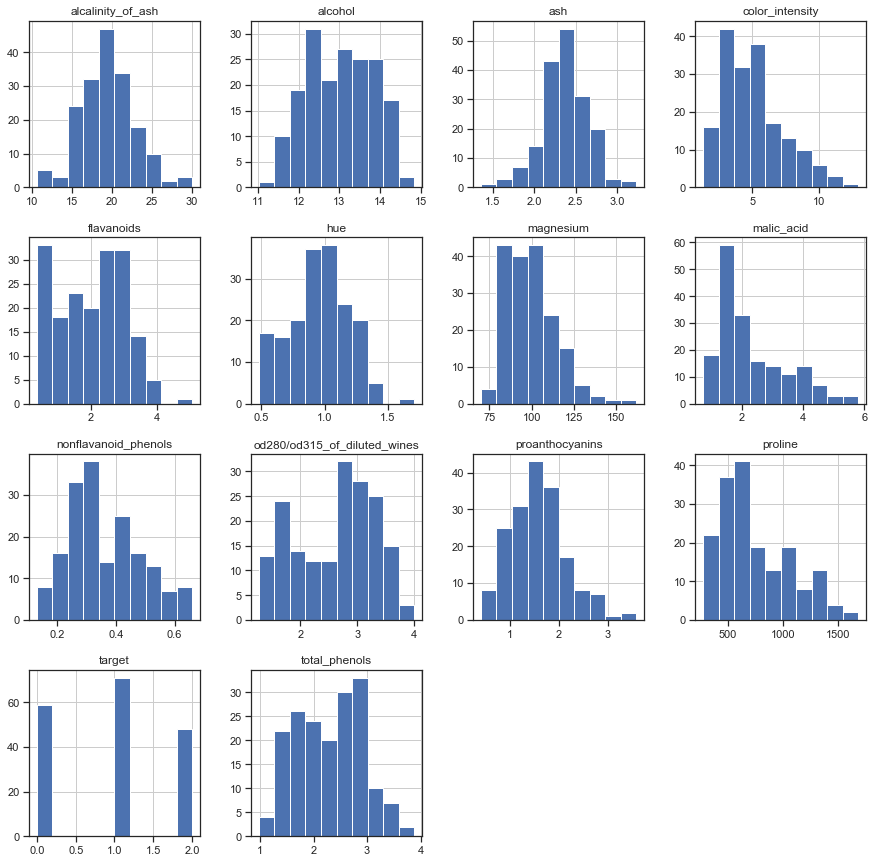

In [229]:
_ = df.hist(figsize=(15,15))

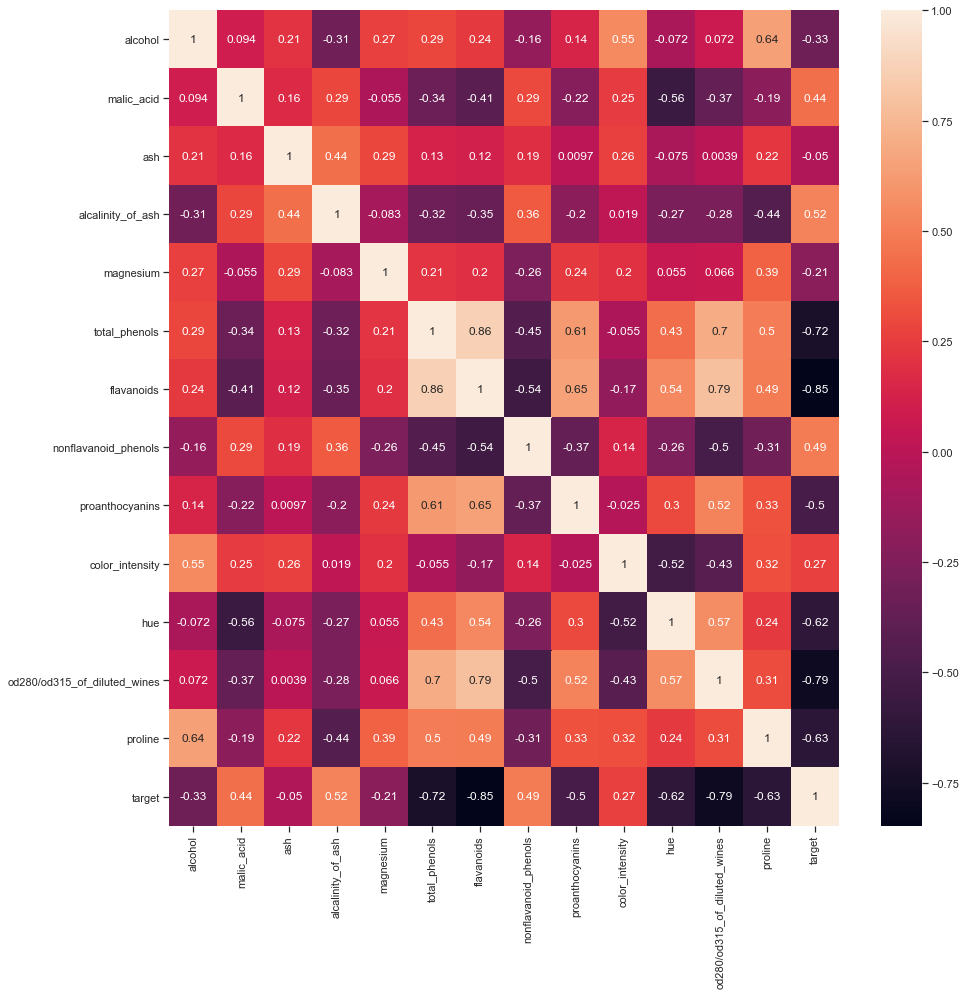

In [230]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df.corr(), annot = True, ax=ax)

Text(0.5, 0, 'target')

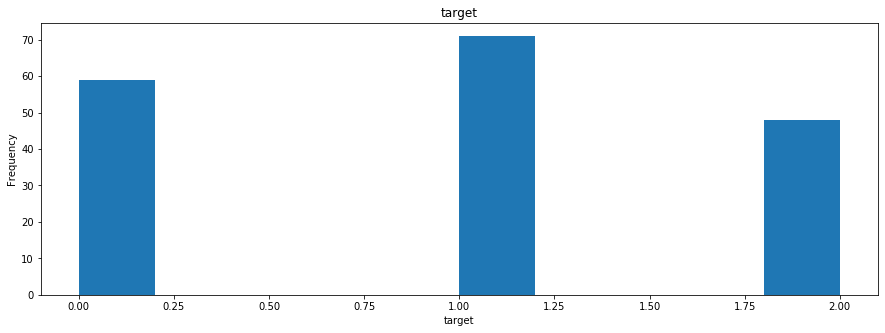

In [181]:
feature = 'target'
plt.figure(figsize=(15,5))
df[feature].plot(kind='hist', title=feature)
plt.xlabel(feature)

In [182]:
df['target'].value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

### Missings

In [183]:
df.isna().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
target                          False
dtype: bool

### Classification

#### Normalize data

In [238]:
from sklearn import preprocessing
X = preprocessing.normalize(df.drop(['target'], axis=1))
y = df['target'].values

In [239]:
X

array([[1.32644724e-02, 1.59397384e-03, 2.26512072e-03, ...,
        9.69434383e-04, 3.65402190e-03, 9.92738094e-01],
       [1.25128005e-02, 1.68733218e-03, 2.02859038e-03, ...,
        9.95336401e-04, 3.22299406e-03, 9.95336401e-01],
       [1.10630135e-02, 1.98394467e-03, 2.24454758e-03, ...,
        8.65874158e-04, 2.66487484e-03, 9.96175609e-01],
       ...,
       [1.57227449e-02, 5.07108879e-03, 2.67772446e-03, ...,
        6.99051960e-04, 1.84834078e-03, 9.89336248e-01],
       [1.55136606e-02, 3.05090212e-03, 2.79175213e-03, ...,
        7.06772691e-04, 1.90828627e-03, 9.89481768e-01],
       [2.48340486e-02, 7.20591644e-03, 4.81566123e-03, ...,
        1.07209976e-03, 2.81206495e-03, 9.84222734e-01]])

In [240]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2.])

In [241]:
y.shape

(178,)

#### Preparing target labels for keras model

In [242]:
from keras.utils import to_categorical
y_cat = to_categorical(y)

In [243]:
print(y_cat.shape)

(178, 3)


In [244]:
y_cat

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

#### Model

In [191]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

n_features = len(df.columns)-1
model = Sequential()
#Dense: number of labels/classes, activation funct: softmax for multi-classf, sigmoid for binary classf.
model.add(Dense(3, input_shape=(n_features,), activation = 'softmax'))  
#Loss optimizer: Adam, SGD, loss funct= categorical_crossentropy for multi-class, binary_crossentropy for binary class.
model.compile(Adam(lr=1), loss='categorical_crossentropy', metrics = ['accuracy'])

In [192]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Train and Test split

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_cat,test_size = 0.2)

In [194]:
len(X_train)

142

In [195]:
y_train.shape

(142, 3)

#### Train model

In [196]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

Train on 142 samples, validate on 36 samples
Epoch 1/100
142/142 [==============================] - 0s 2ms/step - loss: 1.5418 - accuracy: 0.4225 - val_loss: 1.2936 - val_accuracy: 0.3889
Epoch 2/100
142/142 [==============================] - 0s 56us/step - loss: 1.2593 - accuracy: 0.3732 - val_loss: 1.3596 - val_accuracy: 0.1944
Epoch 3/100
142/142 [==============================] - 0s 63us/step - loss: 1.0045 - accuracy: 0.4718 - val_loss: 0.8746 - val_accuracy: 0.6944
Epoch 4/100
142/142 [==============================] - 0s 70us/step - loss: 0.8828 - accuracy: 0.6972 - val_loss: 1.0649 - val_accuracy: 0.3056
Epoch 5/100
142/142 [==============================] - 0s 56us/step - loss: 0.8705 - accuracy: 0.5211 - val_loss: 0.7646 - val_accuracy: 0.6389
Epoch 6/100
142/142 [==============================] - 0s 56us/step - loss: 0.8373 - accuracy: 0.6408 - val_loss: 0.7842 - val_accuracy: 0.7222
Epoch 7/100
142/142 [==============================] - 0s 56us/step - loss: 0.7098 - accurac

In [211]:
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

from sklearn.metrics import classification_report
y_test_pred= (y_test_pred> 0.5) 
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.94      0.79      0.86        19
           2       0.88      1.00      0.93         7

   micro avg       0.88      0.83      0.86        36
   macro avg       0.87      0.86      0.86        36
weighted avg       0.89      0.83      0.86        36
 samples avg       0.83      0.83      0.83        36

